# Pseudotime cluster line plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colormap import *

def NormalizeData(data): 
    # normalize between [0:1]
    # input: numpy list
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def convert_to_one_row(df):
    # convert dataframe to one row,each row will be moved after the first row
    df.index = df.index + 1
    df_out = df.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    return(df_out.to_frame())

def convert_to_int(raw_list):
    # convert index or column name of pandas df to int
    return(list(map(int,raw_list.astype(str).astype(float))))

# read

In [2]:
s0_heatmap_raw=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_reordered_rsquare_0.8.heat_no_HP.csv',index_col=0)
s0_heatmap_raw

,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
genename,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.460269,0.547714,0.662784,0.639182,0.412890,0.446849,0.289543,0.430582,0.507381,0.491335,...,0.000000,0.005267,0.006137,0.000000,0.000000,0.005817,0.005438,0.000000,0.006137,0.005483
Ablim1,0.437539,0.508333,0.401953,0.441548,0.343543,0.506206,0.420132,0.525218,0.462310,0.350710,...,0.005374,0.000000,0.000000,0.005982,0.000000,0.005982,0.005593,0.000000,0.006311,0.005639
Afdn,0.611458,0.799459,0.818547,0.755192,0.620240,0.640561,0.659508,0.618888,0.810864,0.727030,...,0.033580,0.039988,0.040968,0.028470,0.028845,0.038565,0.026054,0.015338,0.040766,0.036220
Amot,0.524645,0.658351,0.706745,0.557881,0.562654,0.375068,0.693639,0.402397,0.541343,0.633669,...,0.077565,0.034457,0.037778,0.069454,0.039320,0.062338,0.036555,0.029549,0.046606,0.048261
Amotl1,0.139043,0.115425,0.120398,0.145072,0.144823,0.147142,0.159108,0.142506,0.108683,0.131581,...,0.006186,0.000000,0.000000,0.000000,0.007198,0.000000,0.000000,0.007400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,3.109274,3.799754,2.051065,4.132637,2.862501,2.367092,3.181409,2.866214,1.937506,2.640880,...,2.907154,3.270218,3.218147,2.906249,2.846812,3.151318,3.278560,2.679825,3.266719,3.203581
Slc4a1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.349594,2.367683,2.449108,2.437371,2.315186,2.435062,2.409855,2.381743,2.396260,2.365552
St3gal6,0.248666,0.381527,0.370505,0.440260,0.345515,0.347577,0.315643,0.406563,0.291613,0.350114,...,0.831471,0.783010,0.828622,0.794507,0.808420,0.874255,0.842958,0.765535,0.786967,0.773444


In [3]:
cluster_no=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/bar_reorder_cluster_in_10.csv',index_col=0)
cluster_no

,cluster_of_10
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1016,8.0
1017,8.0
1018,8.0
1019,8.0


In [4]:
time_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_pseudotime_noHP_allcell.csv',index_col=0)
time=time_df.loc['time',]
time.index=convert_to_int(time.index)
time

400      0.090547
4802     0.093773
6769     0.097471
4543     0.097574
4758     0.098463
           ...   
11122    0.999351
3784     0.999367
11473    0.999785
11604    0.999789
12093    0.999826
Name: time, Length: 9815, dtype: float64

In [5]:
# norm by row

s0_heatmap_raw_min=s0_heatmap_raw.min(axis=1)
s0_heatmap_raw_max=s0_heatmap_raw.max(axis=1)
s0_row_range=s0_heatmap_raw_max-s0_heatmap_raw_min

s0_heatmap_norm_by_row=s0_heatmap_raw.subtract(s0_heatmap_raw_min,axis=0).div(s0_row_range,axis=0)
s0_heatmap_norm_by_row.columns=convert_to_int(s0_heatmap_norm_by_row.columns.astype(str).astype(float))
s0_heatmap_norm_by_row

,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
genename,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.694447,0.826383,1.000000,0.964390,0.622963,0.674200,0.436859,0.649657,0.765529,0.741320,...,0.000000,0.007947,0.009259,0.000000,0.000000,0.008776,0.008205,0.000000,0.009259,0.008273
Ablim1,0.591327,0.687004,0.543233,0.596745,0.464294,0.684130,0.567802,0.709825,0.624805,0.473980,...,0.007263,0.000000,0.000000,0.008084,0.000000,0.008084,0.007559,0.000000,0.008529,0.007620
Afdn,0.728804,0.952885,0.975636,0.900122,0.739272,0.763493,0.786076,0.737660,0.966479,0.866557,...,0.040025,0.047663,0.048830,0.033933,0.034381,0.045966,0.031053,0.018282,0.048589,0.043171
Amot,0.739501,0.930771,1.000000,0.787046,0.793874,0.525526,0.981252,0.564622,0.763388,0.895462,...,0.099940,0.038273,0.043023,0.088337,0.045229,0.078157,0.041273,0.031252,0.055653,0.058020
Amotl1,0.398446,0.330763,0.345016,0.415722,0.415010,0.421654,0.455945,0.408370,0.311444,0.377061,...,0.017725,0.000000,0.000000,0.000000,0.020626,0.000000,0.000000,0.021204,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,0.538470,0.716089,0.266257,0.801720,0.474991,0.347552,0.557026,0.475946,0.237045,0.417981,...,0.486477,0.579872,0.566477,0.486244,0.470955,0.549286,0.582017,0.427999,0.578971,0.562730
Slc4a1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.874243,0.880973,0.911270,0.906903,0.861440,0.906044,0.896665,0.886205,0.891607,0.880181
St3gal6,0.243065,0.384461,0.372731,0.446968,0.346135,0.348330,0.314345,0.411106,0.288771,0.351030,...,0.863311,0.811736,0.860278,0.823971,0.838778,0.908843,0.875535,0.793139,0.815947,0.801555


In [6]:
#get idx
trend_line_heatmap=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10_reorder.csv',index_col=0)
sampled_idx=trend_line_heatmap.columns.astype(str)
sampled_idx=convert_to_int(sampled_idx)

# s0 line cluster plot

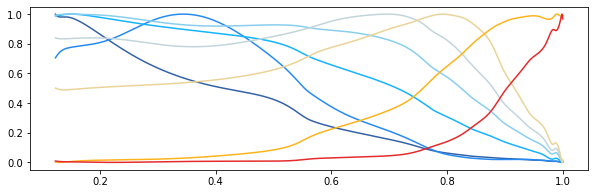

In [7]:
cluster_no_list=[1,2,3,4,5,6,7,8]

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
color_list=solarExtra.copy()

# perform conversion
for i in range(0, len(sampled_idx)):
    sampled_idx[i] = int(sampled_idx[i])

for enu,i in enumerate(cluster_no_list):
    


    one_cluster=cluster_no[cluster_no.cluster_of_10==i]
    one_cluster_idx=one_cluster.index
    one_cluster_heatmap=s0_heatmap_norm_by_row.reset_index(drop=True).loc[one_cluster_idx,].reset_index(drop=True)
    
    Y=one_cluster_heatmap[sampled_idx].reset_index(drop=True).mean()
    X=time[time.index.isin(sampled_idx)].reset_index(drop=True)
    
    import bezier

    nodes1 = np.asfortranarray([
        X,
        Y,
    ])

    curve1 = bezier.Curve(nodes1, degree=len(X)-1)
    
    curve_dots=curve1.evaluate_multi(np.linspace(0, 1, num=1000))#.to_numpy()
    ax.grid(False)
    ax.set_facecolor('white')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    
    #correlation_xy=np.corrcoef(curve_dots[0,:], NormalizeData(curve_dots[1,:]))
    #plt.title(str(correlation_xy[0,1]))
    ax.plot(curve_dots[0,:],NormalizeData(curve_dots[1,:]),color=color_list[enu])
    #ax.plot(X,NormalizeData(Y),color='red')
    
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/pseudotime_cluster.pdf')


# colormap

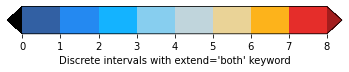

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from colormap import *

color_list=solarExtra.copy()
color_list=['black']+color_list

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = LinearSegmentedColormap.from_list("mycmap", color_list)
bounds = [0,1, 2, 3, 4, 5, 6,7,8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/pseudotime_cluster_map.pdf')